# Lab 4 - Hypothesis testing and statistical analysis

Please read this to the end before starting. There is important information towards the end.

## Get the data (1 mark)

The data is `census11sample.csv`. Download it from BlackBoard. You can also get it from <href = 'https://syllabus.cs.man.ac.uk/ugt/2021/COMP13212/spam.csv'>http://syllabus.cs.man.ac.uk/ugt/2021/COMP13212/spam.csv>. Read it into a DataFrame.

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is derived from the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. The samples were sampled from this data by Jonathan Shapiro.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
from scipy import stats
from scipy.stats import norm


ImportError: cannot import name 'ParserError' from 'dateutil.parser' (/usr/lib/python3/dist-packages/dateutil/parser/__init__.py)

## Divide the data (2 marks)

In [2]:
df2= df.drop(columns='Unnamed: 0')
sample_explore= df2.head(500)

sample_test= df2.tail(500)


You are going to explore this data and from your explorations devise a hypothesis to test. Once you generate a hypothesis, you need a fresh set of data on which to test it. If you use the same data, it is biased in favor of your hypothesis. So, split the data in to two parts, a set for exploration and hythesis generation, and a set on which to test the hypothesis. In what follows, I will call the two sets: sample_explore and sample_test. (You can call them whatever you want.)

## Explore the data (5 marks)

Explore dataset sample_explore. Measure descriptive statistics, plot histograms, scatterplots, and whatever. Find something interesting in the data, and generate a hypothesis about it. Remember, a hypothesis is a statement which is true or false, and can be falsefied.  

In [3]:
pd.set_option('display.max_rows',500)
sample_explore

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
5,27,26,66,70,33,41,38,78,63
6,42,44,49,59,40,65,13,8,52
7,62,44,41,76,8,74,54,40,72
8,34,17,33,71,45,73,1,77,75
9,15,46,37,3,13,41,19,47,69


In [4]:
mask = sample_explore['North West'] <= 20
df = sample_explore[mask]
df['North West'].count()

137

In [5]:
mask = sample_explore['North East'] <= 20
df = sample_explore[mask]
df['North East'].count()

112

In [6]:
mask = sample_explore['Yorkshire and The Humber'] <= 20
df = sample_explore[mask]
df['Yorkshire and The Humber'].count()

123

In [7]:
mask = sample_explore['East Midlands'] <= 20
df = sample_explore[mask]
df['London'].count()

148

In [8]:
mask = sample_explore['West Midlands'] <= 20
df = sample_explore[mask]
df['West Midlands'].count()

131

In [9]:
mask = sample_explore['East of England'] <= 20
df = sample_explore[mask]
df['East of England'].count()

116

In [10]:

mask = sample_explore['London'] <= 20
df = sample_explore[mask]
df['London'].count()

150

In [11]:
mask = sample_explore['South East'] <= 20
df = sample_explore[mask]
df['South East'].count()

117

In [12]:
mask = sample_explore['South West'] <= 20
df = sample_explore[mask]
df['South West'].count()

107

In [13]:
sample_explore.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,41.120000,39.530000,38.492000,38.76000,40.582000,42.104000,35.07400,41.198000,43.42800
std,22.662409,23.727095,22.468101,23.71876,23.638037,24.282514,22.37834,23.157533,24.03948
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,23.000000,19.000000,21.000000,18.00000,20.000000,22.000000,17.00000,23.000000,23.00000
50%,42.000000,40.000000,37.000000,37.00000,42.000000,41.000000,33.50000,42.000000,44.00000
75%,58.000000,57.000000,54.000000,59.00000,59.000000,62.000000,51.00000,60.000000,61.00000
max,90.000000,98.000000,94.000000,90.00000,96.000000,97.000000,96.00000,92.000000,98.00000


Text(0, 0.5, 'Number of Individuals')

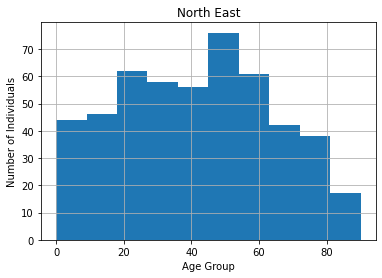

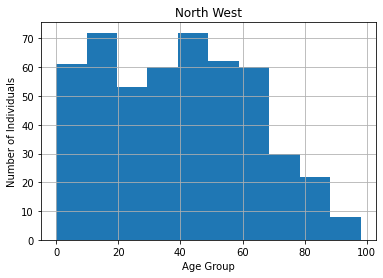

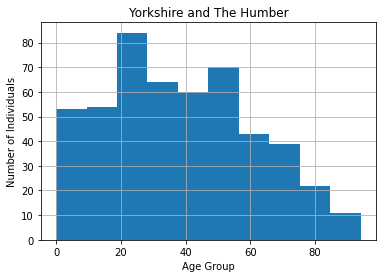

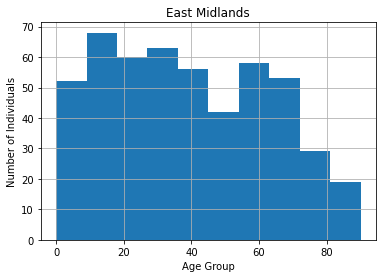

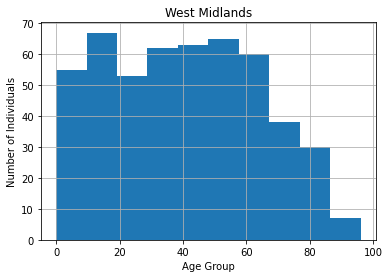

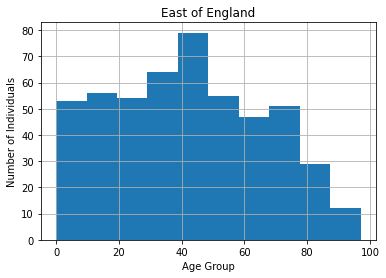

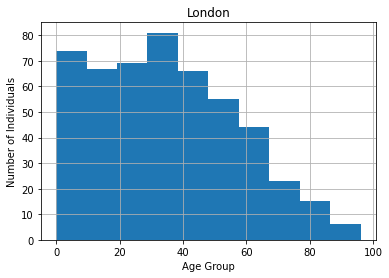

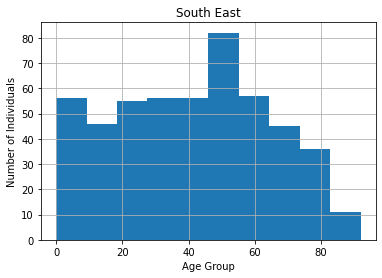

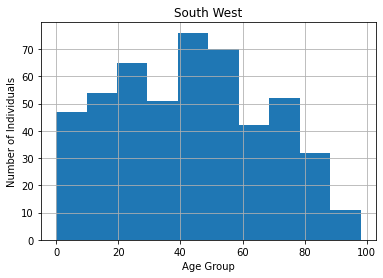

In [14]:
sample_explore.hist(['North East'])
plt.title("North East")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['North West'])
plt.title("North West")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['Yorkshire and The Humber'])
plt.title("Yorkshire and The Humber")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['East Midlands'])
plt.title("East Midlands")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['West Midlands'])
plt.title("West Midlands")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['East of England'])
plt.title("East of England")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['London'])
plt.title("London")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['South East'])
plt.title("South East")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

sample_explore.hist(['South West'])
plt.title("South West")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")

Text(0.5, 1.0, 'Regions')

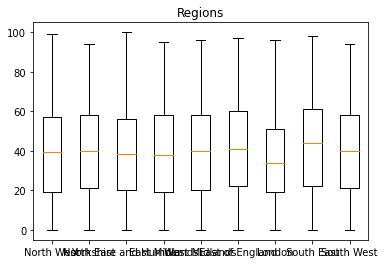

In [15]:
df4 = pd.read_csv("census11sample(1).csv", index_col = 0)
NW = list(df4["North West"])
NE = list(df4["North East"])
YH = list(df4["Yorkshire and The Humber"])
EM = list(df4["East Midlands"])
WM =  list(df4["West Midlands"])
EE = list(df4["East of England"])
LN = list(df4["London"])
SW = list(df4["South West"])
SE = list(df4["North East"])
pp.boxplot([NW,NE,YH,EM,WM,EE,LN,SW,SE], labels=["North West", "North East","Yorkshire and Humber","East Midlands","West Midlands","East of England","London","South East","South West"])
pp.title("Regions")

## State your hypothesis, and state the evidence that justifies it. (2 marks)

My hypothesis is that London has the most people under the age of 20 and therefore the average mean of London  is comparitively lower than the mean of the rest of the regions combined.

The boxplot implies that the average mean of London is slightly lower than other regions.Histograms have higher frequency bar within the range of 0-20.

The count function results in higher number of people under the age of 20.




## Plan the test. (3 marks)

State how you plan to test the hypothesis briefly. State the null hypothesis and the probability level at which you will role it out (95%, 99%, etc.).

We will use the lower tail test and the z test in order to execute our test.(one tail)

Z test is used because the population is greater than 50.

Calculate the combined mean of the uk and the mean of of all the regions separatly.

We will roll it out with a 95% probability level.

The null hypothesis is that the Average mean of London is same as the rest of the UK.

## Perform the statistical test of the hypothesis. (5 marks)

You may do this using classical statistical methods, Bayesian methods, or, if you are uncomfortable with the notion that the data is normally distributed, you can use Monte Carlo (bootstrap) sampling. 

In [16]:
sample_test

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
500,38,77,14,27,31,6,15,67,58
501,58,19,62,53,3,23,37,9,60
502,11,14,51,24,32,31,28,73,53
503,53,50,44,80,1,62,39,5,80
504,55,66,44,84,67,42,26,45,3
505,25,46,42,12,7,27,10,41,19
506,51,23,30,8,74,75,26,25,89
507,83,10,60,36,68,41,56,15,45
508,36,42,18,41,7,37,20,43,50
509,3,55,73,37,69,17,31,50,75


In [17]:
sample_test.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.222000,38.628000,39.352000,39.596000,39.780000,40.730000,36.764000,38.838000,43.244000
std,23.767678,22.886091,23.566903,23.231362,23.458393,22.756908,21.980778,23.085529,24.779842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,19.000000,19.750000,20.000000,20.000000,22.750000,21.000000,20.000000,21.000000
50%,38.000000,39.000000,40.500000,40.000000,40.000000,41.000000,34.500000,39.000000,44.000000
75%,58.000000,56.000000,59.000000,58.000000,58.000000,58.000000,52.000000,56.250000,62.000000
max,94.000000,99.000000,100.000000,95.000000,96.000000,96.000000,94.000000,95.000000,95.000000


In [18]:
sample_test.mean().mean()

39.57266666666666

In [19]:
sample_test.std().var()

0.5948047876559813

Z test

Mean= 36.76

Standard Deviation= 21.9

Probability level= 95%(0.05),p value should be leser than 0.05

critcal value= -1.645(answer should be less than the critical value)




In [20]:
alpha=0.05
n=500
mean=36.76
deviation=21.9
Z=np.sqrt(n)*(mean-39.57)/deviation
print('Test statistic is %2.2f' %(Z))
print('Lower-tail critical values is %2.3f' %(norm.ppf(alpha)))
print('p-value is %2.4f' %(norm.cdf(Z)))

Test statistic is -2.87
Lower-tail critical values is -1.645
p-value is 0.0021


One tail test

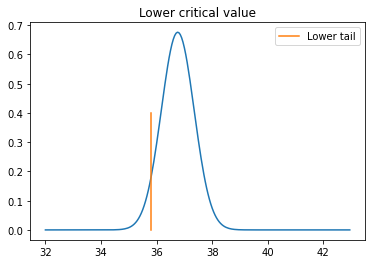

In [21]:
alpha = 0.05
x = np.arange(32,43,0.05)
y = stats.norm.pdf(x,36.76,.59)
lower = stats.norm.ppf(alpha,36.76,0.59)
plt.plot(x,y)
plt.plot([lower,lower],[0,0.4],label="Lower tail")
plt.legend()
plt.title("Lower critical value")
plt.show()

## Conclusions. (2 Marks) 

We reject the null hypothesis as the p value and z statistic is lesser than 0.05 and -1.645.

## What to submit.

You will submit a Jupyter Notebook/Lab to GitLab. The notebook needs to have the same headings as this document, but only up to the conclusions section. I.e. every section with a mark associated with it. Fill in each section with the appropriate text, code, measurements and graphics to perform the required tasks. You can start with this document, and fill it in. 

# The End